In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
combi = train.append(test, ignore_index = True)

/home/nishesh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
train.shape

(31962, 3)

In [6]:
combi.shape

(49159, 3)

In [7]:
test.shape

(17197, 2)

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [11]:
#remove twitter handles i.e. @user
#np.vectorize takes a nested sequence of objects or numpy arraysand return a numpy array
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [12]:
#remove special characters, numbers and punctuations and replace them with spaces
# ^ matches the complement of the set.
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [14]:
#remove the words whose length is less than 4
#lambda is an anonymous function
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [15]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [16]:
#split the sentence into individual words
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [17]:
#stemming: removing suffices like ing, ly, es, s
from nltk.stem.porter import *

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [18]:
#joining the tokenized tweet
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

In [19]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


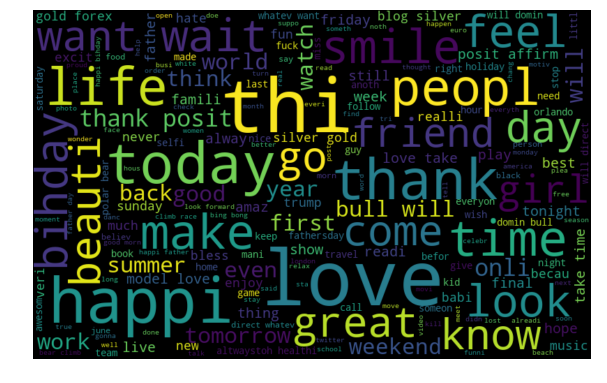

In [21]:
#visualization with wordcloud
all_words = ' '.join([text for text in combi['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

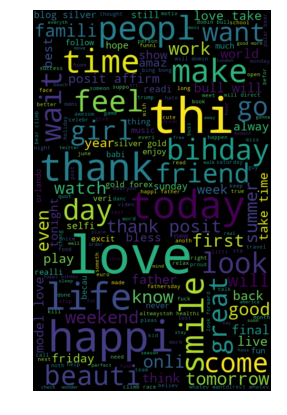

In [24]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(height = 800, width = 500, random_state = 21, max_font_size = 110).generate(normal_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

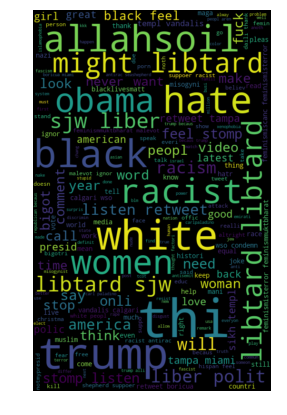

In [26]:
negative_words = ' '.join(text for text in combi['tidy_tweet'][combi['label'] == 1])

wordcloud = WordCloud(height = 800, width = 500, random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [28]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    #Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
                        
    return hashtags

In [34]:
#extracting hashtags from non racists/sexists tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

#extracting hastags from racists/sexists tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

#unnesting list
#print(HT_regular[0:10])
HT_regular = sum(HT_regular, [])
#print(HT_regular[0:10])
HT_negative = sum(HT_negative, [])

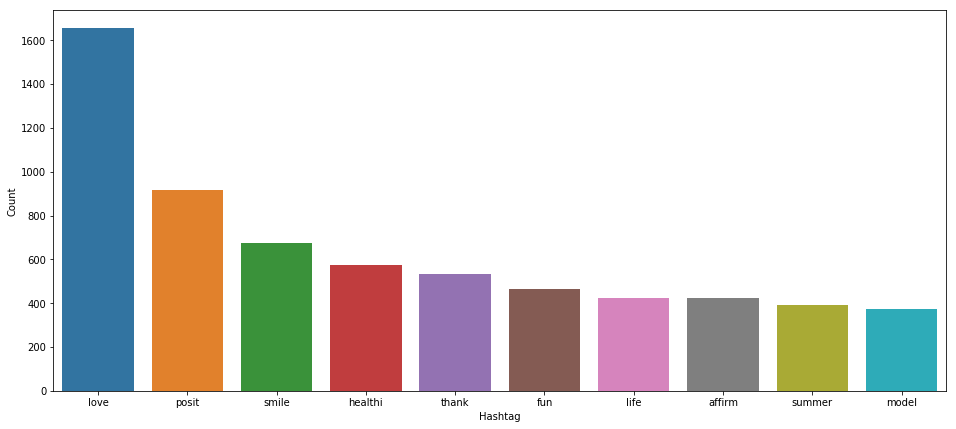

In [37]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                   'Count': list(a.values())})

#selecting the top 10 most frequent hashtags
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (16, 7))
ax = sns.barplot(data = d, x = 'Hashtag', y = 'Count')
ax.set(ylabel = 'Count')
plt.show()

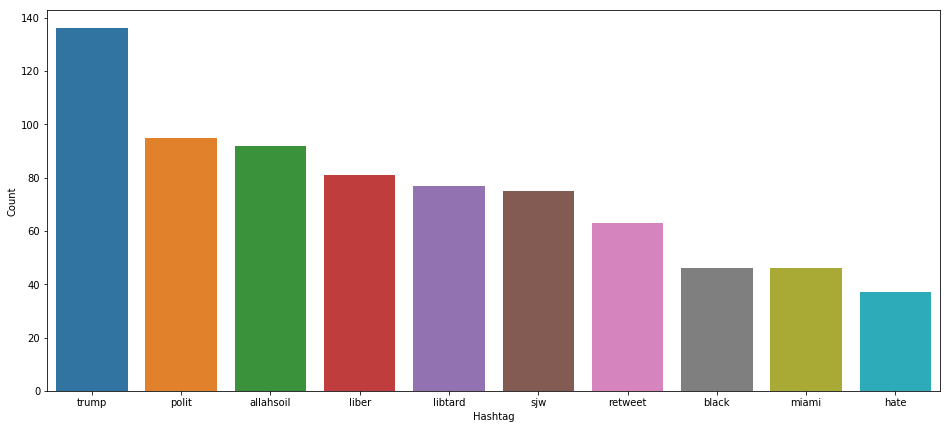

In [38]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (16, 7))
ax = sns.barplot(data = d, x = 'Hashtag', y = 'Count')
ax.set(ylabel = 'Count')
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

#max_df is the maximum % of frequency to take into account and min_df is the minimum frequency in the entire document
#stop_words are those words which should not be considered as features
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

#bag of words features matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [43]:
print(tfidf)

  (0, 302)	0.46871135687055143
  (0, 463)	0.5896490179849546
  (0, 738)	0.6577413621857342
  (1, 879)	0.3938403468675415
  (1, 131)	0.6145629375807904
  (1, 600)	0.6835218920644196
  (2, 79)	1.0
  (3, 557)	0.7040384885805177
  (3, 518)	0.44016705593507854
  (3, 888)	0.5572995329862621
  (4, 566)	1.0
  (5, 423)	0.586120951905663
  (5, 858)	0.4743403266916206
  (5, 69)	0.4637175931713698
  (5, 485)	0.4652198168550412
  (6, 121)	0.809676118019697
  (6, 894)	0.5868769751051355
  (7, 749)	0.47546741144240784
  (7, 992)	0.40382612331421974
  (7, 283)	0.6221668428341786
  (7, 883)	0.20713435439054187
  (7, 393)	0.22953868678391207
  (7, 432)	0.298367397816037
  (7, 353)	0.19785820398515808
  (8, 518)	0.2913310184015602
  :	:
  (49154, 87)	0.42669972987029553
  (49155, 498)	0.38062516605968433
  (49155, 307)	0.412937926376108
  (49155, 961)	0.532509130693973
  (49155, 246)	0.6332778044821932
  (49156, 891)	0.2234444840195207
  (49156, 498)	0.22464038972727007
  (49156, 605)	0.36246533968129546

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

#splitting data into train and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state = 42, test_size = 0.3)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)   #train the model

prediction = lreg.predict_proba(xvalid_bow)  #prediction on validation set
prediction_int = prediction[:, 1] >= 0.3  #if prediction >=0.3 then 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5307820299500832

In [51]:
print(prediction[0:2])
print(prediction_int)

[[9.99260386e-01 7.39613560e-04]
 [9.88846815e-01 1.11531848e-02]]
[0 0 0 ... 0 1 0]


In [58]:
#predict the label on test set
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_pred_int[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [60]:
#building model with tfidf features
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:, 1] >= 0.3
prediction_intConverted = prediction_int.astype(np.int)

f1_score(yvalid, prediction_intConverted)

0.5446507515473032

In [61]:
print(prediction[0:5])
print(prediction_int[0:5])
print(prediction_intConverted)

[[0.98041478 0.01958522]
 [0.98130885 0.01869115]
 [0.88047704 0.11952296]
 [0.96561989 0.03438011]
 [0.99275735 0.00724265]]
[False False False False False]
[0 0 0 ... 0 1 0]


In [63]:
test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_pred_int

array([0, 0, 0, ..., 0, 0, 0])